<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork1005-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Application Programming Interface


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Create and Use APIs in Python



### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API  


## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Pandas is an API</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [2]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance
!pip install --upgrade nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [4]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [6]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width="800," align="center" alt="logistic regression block diagram">


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.




In [7]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [8]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork1005-2022-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [9]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [10]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [11]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1670216517655, 17359.93226426968],
 [1670220007584, 17335.209928550514],
 [1670223664936, 17313.188379228948],
 [1670227346407, 17353.65095550951],
 [1670230825009, 17362.294935265112]]

Finally lets turn this data into a Pandas DataFrame.


In [22]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])

In [23]:
data

,TimeStamp,Price
0,1670216517655,17359.932264
1,1670220007584,17335.209929
2,1670223664936,17313.188379
3,1670227346407,17353.650956
4,1670230825009,17362.294935
...,...,...
719,1672797718525,16711.207156
720,1672801322631,16743.058686
721,1672804815155,16823.860041
722,1672804884712,16823.860041


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [24]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))


In [29]:
data[:10]

,TimeStamp,Price,date
0,1670216517655,17359.932264,2022-12-05
1,1670220007584,17335.209929,2022-12-05
2,1670223664936,17313.188379,2022-12-05
3,1670227346407,17353.650956,2022-12-05
4,1670230825009,17362.294935,2022-12-05
5,1670234428356,17323.410842,2022-12-05
6,1670238152670,17322.553317,2022-12-05
7,1670241708943,17307.388932,2022-12-05
8,1670245203276,17261.150913,2022-12-05
9,1670248909666,17269.310502,2022-12-05


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [27]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

In [28]:
candlestick_data

date         Price                                          
                         min           max         first          last
0   2022-12-05  16940.094705  17362.294935  17359.932264  16956.882520
1   2022-12-06  16962.526726  17053.793722  16973.119218  16983.862390
2   2022-12-07  16781.776625  17088.005860  17085.643141  16851.103521
3   2022-12-08  16809.553780  17253.400910  16849.191360  17204.871667
4   2022-12-09  17122.008605  17258.847910  17226.037049  17139.627301
5   2022-12-10  17137.509115  17217.406936  17138.345164  17141.825153
6   2022-12-11  17108.571064  17231.656730  17121.258221  17108.571064
7   2022-12-12  16869.536538  17184.478049  17101.038020  17167.672455
8   2022-12-13  17140.605481  17896.637940  17179.596038  17786.015294
9   2022-12-14  17756.386569  18320.817235  17777.458744  17826.100927
10  2022-12-15  17337.361803  17808.716173  17808.716173  17337.361803
11  2022-12-16  16741.045696  17478.099782  17339.041307  16741.045696
12  2022-12-17  16650.249619  16758.925192  16650.249619  16743.301541
13  2022-12-18  16687.996635  16800.559334  16783.533402  16800.559334
14  2022-12-19  16408.929915  16794.452547  16742.816664  16408.929915
15  2022-12-20  16454.222446  16940.613225  16454.222446  16884.341762
16  2022-12-21  16761.235571  16916.070974  16916.070974  16777.551794
17  2022-12-22  16611.770554  16882.232875  16822.639890  16800.947533
18  2022-12-23  16800.389952  16891.297302  16830.385067  16802.190131
19  2022-12-24  16791.455439  16859.602707  16791.455439  16847.802248
20  2022-12-25  16769.859044  16849.932722  16848.649159  16813.158457
21  2022-12-26  16818.749630  16895.732317  16842.720261  16843.692990
22  2022-12-27  16647.597013  16895.753540  16895.753540  16701.282355
23  2022-12-28  16514.471146  16717.054806  16699.692138  16515.817326
24  2022-12-29  16527.808756  16659.638928  16541.377135  16624.522841
25  2022-12-30  16464.043979  16646.170466  16646.170466  16589.023380
26  2022-12-31  16521.815520  16611.607871  16609.134315  16521.815520
27  2023-01-01  16518.854339  16614.184021  16542.456148  16605.620779
28  2023-01-02  16573.799637  16743.523050  16619.067535  16715.600424
29  2023-01-03  16625.153163  16750.982601  16674.342536  16677.789389
30  2023-01-04  16659.853022  16874.107266  16676.360310  16874.107266

Finally we are now ready to use plotly to create our Candlestick Chart.


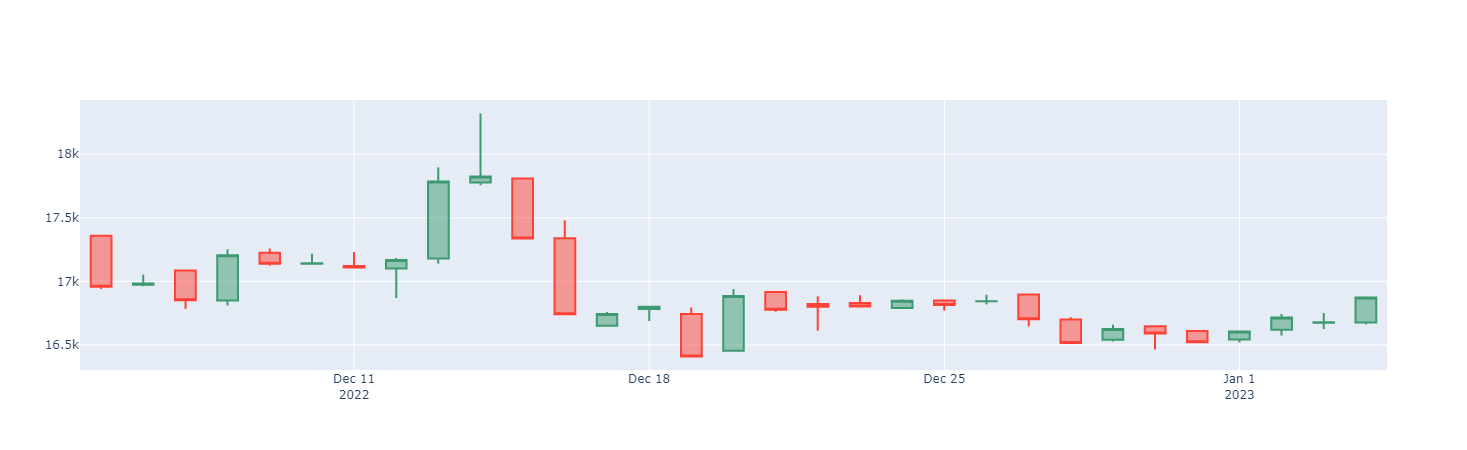

In [34]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:   


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-23 | 3.0 | Azim Hirjani | New API |
| 2020-09-09 | 2.1 | Malika Singla | Spell Check |
| 2020-08-26  | 2.0  | Lavanya | Moved lab to course repo in GitLab |
|   |   |   |   |




<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
